## **Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

## **Loading the Dataset**

In [4]:
df = pd.read_csv('cropdata.csv')

## **Dataset Analysis**

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.size

17600

In [10]:
df.shape

(2200, 8)

In [11]:
# Checking for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())

False


In [13]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [16]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# **Data Visualization**

N (Nitrogen) Skewness: 0.5097213691539147


<Axes: xlabel='N', ylabel='Count'>

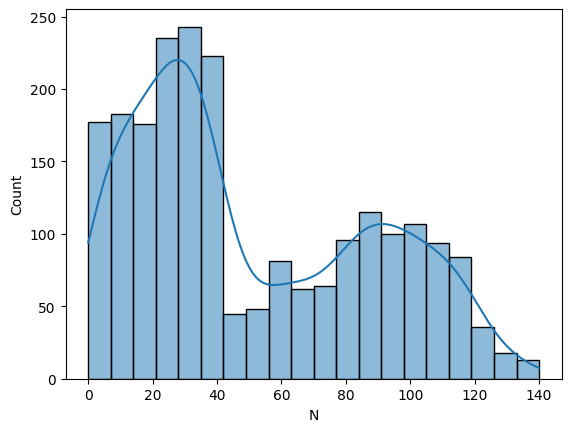

In [17]:
plt.subplot()
skewness_N = df['N'].skew(axis=0)
print("N (Nitrogen) Skewness:", skewness_N)
sns.histplot(df['N'], kde=True, bins=20)

P (Phosphorus) Skewness: 1.0107725431372674


<Axes: xlabel='P', ylabel='Count'>

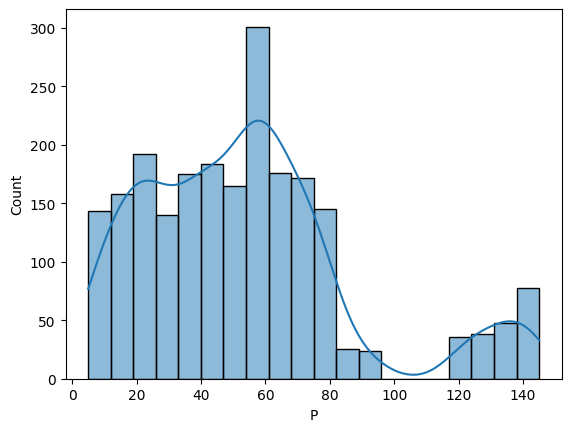

In [18]:
plt.subplot()
skewness_P = df['P'].skew(axis=0)
print("P (Phosphorus) Skewness:", skewness_P)
sns.histplot(df['P'], kde=True, bins=20)

K (Potassium) Skewness: 2.3751672388547


<Axes: xlabel='K', ylabel='Count'>

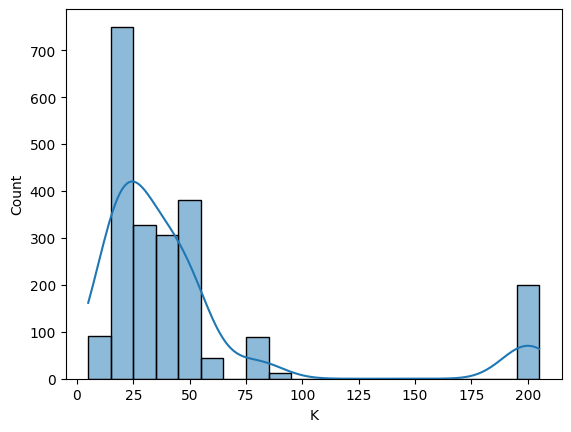

In [19]:
plt.subplot()
skewness_K = df['K'].skew(axis=0)
print("K (Potassium) Skewness:", skewness_K)
sns.histplot(df['K'], kde=True, bins=20)

Temperature Skewness: 0.18493273421137887


<Axes: xlabel='temperature', ylabel='Count'>

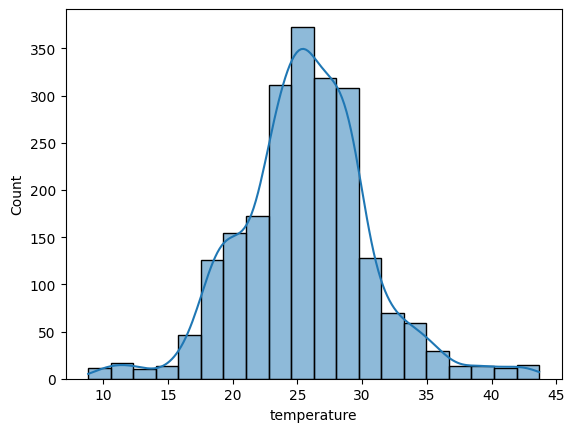

In [20]:
plt.subplot()
skewness_temp = df['temperature'].skew(axis=0)
print("Temperature Skewness:", skewness_temp)
sns.histplot(df['temperature'], kde=True, bins=20)

Humidity Skewness: -1.0917079195808679


<Axes: xlabel='humidity', ylabel='Count'>

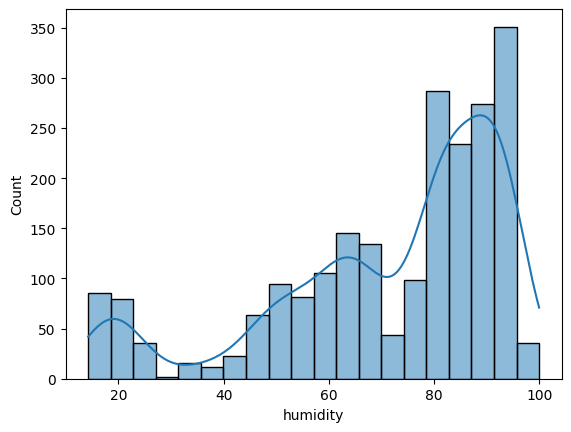

In [21]:
plt.subplot()
skewness_humidity = df['humidity'].skew(axis=0)
print("Humidity Skewness:", skewness_humidity)
sns.histplot(df['humidity'], kde=True, bins=20)

pH Skewness: 0.2839294375729441


<Axes: xlabel='ph', ylabel='Count'>

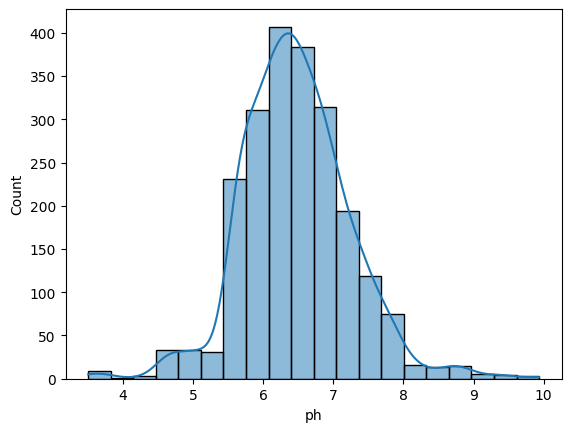

In [22]:
plt.subplot()
skewness_ph = df['ph'].skew(axis=0)
print("pH Skewness:", skewness_ph)
sns.histplot(df['ph'], kde=True, bins=20)

Rainfall Skewness: 0.9657563536272812


<Axes: xlabel='rainfall', ylabel='Count'>

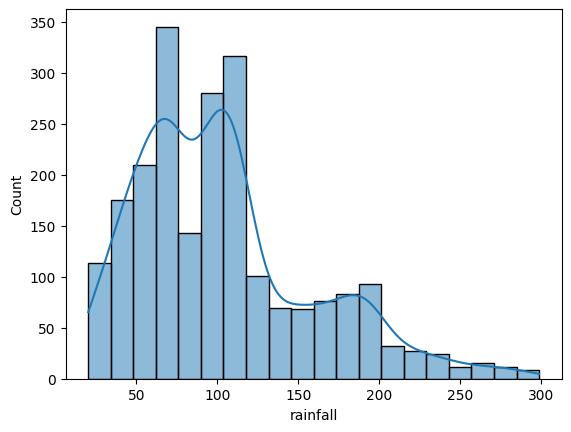

In [23]:
plt.subplot()
skewness_rainfall = df['rainfall'].skew(axis=0)
print("Rainfall Skewness:", skewness_rainfall)
sns.histplot(df['rainfall'], kde=True, bins=20)

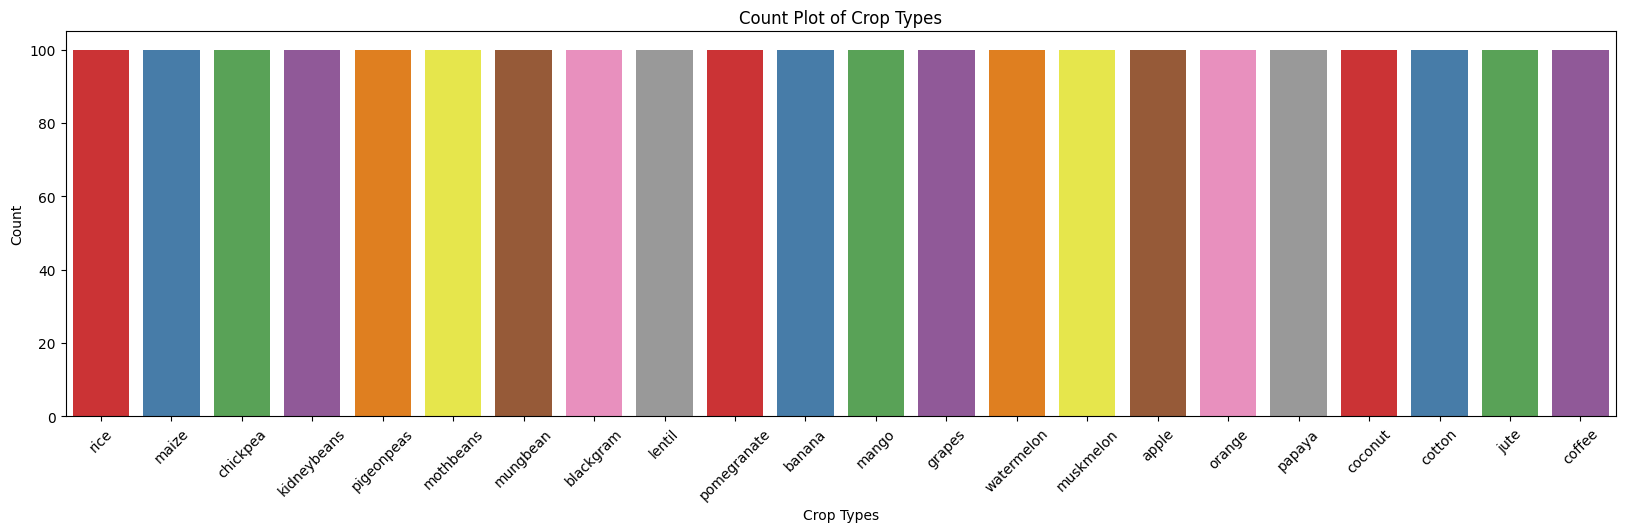

In [24]:
# Create a count plot for the 'Label' column
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='label', palette='Set1')
plt.title('Count Plot of Crop Types')
plt.xlabel('Crop Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

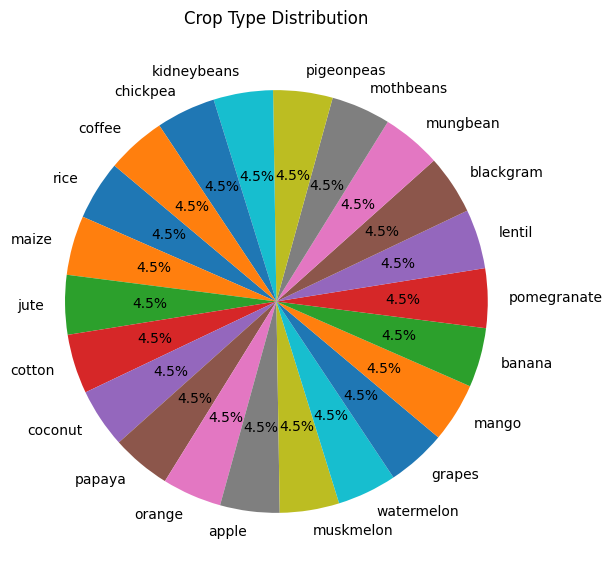

In [25]:
# Count the number of occurrences of each crop type
crop_counts = df['label'].value_counts()
# Create a pie chart using string labels
plt.figure(figsize=(6, 7))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crop Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

<Axes: >

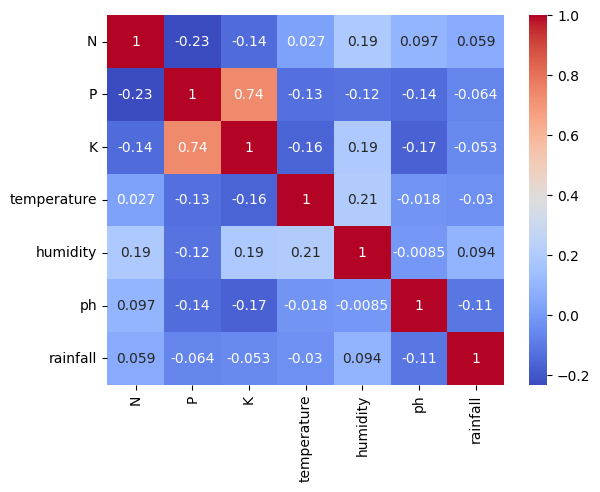

In [26]:
numeric_crop=df.select_dtypes(include=['int64','float64'])
corr = numeric_crop.corr()
corr
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

## **Splitting Data Set into Training Set and Testing Set**

In [27]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [28]:
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [29]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [30]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.4,random_state =4)

In [31]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
2041,80,52,39,26.419152,76.856912,7.165697,197.210178
2115,81,34,30,25.177877,62.262446,6.647766,135.011965
567,23,37,24,28.778334,44.225260,7.991902,33.958257
617,31,58,15,27.110265,84.967717,7.121571,51.526174
1099,117,81,53,29.507046,78.205856,5.507642,98.125658
...,...,...,...,...,...,...,...
456,13,73,20,30.504209,35.488860,5.391560,162.592772
1921,101,58,18,25.668914,81.381033,6.652144,78.595958
709,50,74,17,27.100533,63.360856,6.540821,73.849499
174,76,39,24,24.254745,55.647099,6.995844,64.238455


In [32]:
Xtrain.shape

(1320, 7)

In [33]:
Xtest

,N,P,K,temperature,humidity,ph,rainfall
2052,82,48,36,25.793520,81.769040,6.352077,193.241838
357,34,59,18,23.380026,21.988794,5.744118,87.668987
1784,49,61,45,32.767959,94.573774,6.764213,240.479592
694,4,40,21,28.797281,80.457444,6.725551,44.300705
273,30,70,79,20.269423,19.969789,7.313122,69.644492
...,...,...,...,...,...,...,...
2179,109,23,25,25.117110,68.480304,7.007332,194.877348
610,28,35,22,29.530376,86.733460,7.156563,59.872321
2082,86,39,43,26.145766,71.236909,6.432052,193.100760
380,32,79,15,23.909101,20.746193,5.706199,81.602112


In [34]:
Xtest.shape

(880, 7)

In [35]:
Ytrain

2041          jute
2115        coffee
567      mothbeans
617       mungbean
1099        banana
           ...    
456     pigeonpeas
1921        cotton
709      blackgram
174          maize
1146         mango
Name: label, Length: 1320, dtype: object

In [36]:
Ytrain.shape

(1320,)

In [37]:
Ytest

2052           jute
357     kidneybeans
1784         papaya
694        mungbean
273        chickpea
           ...     
2179         coffee
610        mungbean
2082           jute
380     kidneybeans
1777         papaya
Name: label, Length: 880, dtype: object

In [38]:
Ytest.shape

(880,)


# **Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9477272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        40
      banana       1.00      1.00      1.00        37
   blackgram       0.76      0.78      0.77        40
    chickpea       1.00      1.00      1.00        43
     coconut       0.97      1.00      0.99        37
      coffee       0.95      1.00      0.97        36
      cotton       0.88      0.95      0.91        37
      grapes       1.00      1.00      1.00        44
        jute       0.85      0.80      0.82        44
 kidneybeans       1.00      1.00      1.00        37
      lentil       0.93      0.93      0.93        43
       maize       0.91      0.83      0.87        36
       mango       1.00      1.00      1.00        45
   mothbeans       0.79      0.82      0.81        38
    mungbean       1.00      0.98      0.99        41
   muskmelon       1.00      1.00      1.00        33
      orange       1.00   

In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [41]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LogReg.predict(data)
print(prediction)

['coffee']


In [42]:
data = np.array([[93, 41, 30, 21.7, 75, 6.5, 182.9]])
prediction = LogReg.predict(data)
print(prediction)

['rice']


## **Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9920454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        40
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        40
    chickpea       1.00      1.00      1.00        43
     coconut       1.00      1.00      1.00        37
      coffee       1.00      1.00      1.00        36
      cotton       1.00      1.00      1.00        37
      grapes       1.00      1.00      1.00        44
        jute       0.91      0.98      0.95        44
 kidneybeans       1.00      1.00      1.00        37
      lentil       0.98      1.00      0.99        43
       maize       1.00      1.00      1.00        36
       mango       1.00      1.00      1.00        45
   mothbeans       1.00      0.95      0.97        38
    mungbean       1.00      1.00      1.00        41
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00      1.00

In [44]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [45]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [46]:

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']


## **GradientBoosting**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
gbc=gbc()
gbc.fit(Xtrain,Ytrain)

predicted_values = gbc.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("GradientBoosting's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

GradientBoosting's Accuracy is:  0.9806818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        40
      banana       1.00      1.00      1.00        37
   blackgram       0.89      1.00      0.94        40
    chickpea       1.00      0.98      0.99        43
     coconut       1.00      1.00      1.00        37
      coffee       1.00      1.00      1.00        36
      cotton       0.97      1.00      0.99        37
      grapes       1.00      1.00      1.00        44
        jute       0.88      0.95      0.91        44
 kidneybeans       1.00      1.00      1.00        37
      lentil       0.97      0.88      0.93        43
       maize       1.00      0.97      0.99        36
       mango       1.00      1.00      1.00        45
   mothbeans       0.95      0.97      0.96        38
    mungbean       1.00      1.00      1.00        41
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      

In [48]:
score = cross_val_score(gbc,features,target,cv=5)
score

array([0.99090909, 0.98863636, 0.99318182, 0.99772727, 0.98636364])

In [49]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = gbc.predict(data)
print(prediction)

['coffee']


In [50]:
data = np.array([[93, 41, 30, 21.7, 75, 6.5, 182.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [51]:
data = np.array([[93, 41, 30, 21.7, 75, 6.5, 182.9]])
prediction = LogReg.predict(data)
print(prediction)

['rice']


In [52]:
data = np.array([[93, 41, 30, 21.7, 75, 6.5, 182.9]])
prediction = gbc.predict(data)
print(prediction)

['jute']


In [53]:
#import joblib

In [54]:
#fn="crop_app"
#joblib.dump(RF,'crop_appp')

In [55]:
#app=joblib.load('crop_appp')

In [56]:
#arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
#acc = app.predict(arr)

In [57]:
#acc

In [58]:
import pickle
#pkl="model.pkl"
#with open(pkl,'wb') as file:
# pickle.dump(RF,file)
pickle.dump(RF, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))


In [59]:
'''with open(pkl,'rb') as file:
  pklmodel=pickle.load(file)
pklmodel'''

data = np.array([[93, 41, 30, 21.7, 75, 6.5, 182.9]])
prediction = model.predict(data)
print(prediction)

['coffee']
